# Relatório Final - Reembolsos da Câmara dos Deputados

## Introdução

A motivação em desenvolver esse trabalho advém do fato de querer investigar os gastos públicos dos deputados federais brasileiros. Cada político tem o direito a ter reembolso quando gastam seu dinheiro em atividade que permitam "servir melhor o povo". Então é importante que esses gastos sejam monitorados, para saber como cada deputados está utilizando recursos para pedir reembolso com verbas públicas.

Com as diversas notícias e acusações de corrupção dos políticos é de se imaginar que quando envolve dinheiro é provável que se vá encontrar dados suspeitos. 

Sendo assim, com os conhecimentos adquiridos durante o curso, com a utlização da linguagem Python  e com a ajuda das suas bibliotecas, o objetivo do trabalho é analisar os gastos do deputados.

## Dados Utilizados 

Foi utilizada a base de dados a base [Brazil's House of Deputies Reimbursements](https://www.kaggle.com/epattaro/brazils-house-of-deputies-reimbursements), disponibilizada pelo usuário epattaro do site Kaggle usando dados obtidos do portal da transparência da Câmara dos Deputados. Esta base contém informações sobre os gastos dos deputados entre os anos de 2009 e 2017.

In [2]:
import pandas as pd
from IPython.display import clear_output
from concat_df import concat_df
# Carregar os dados
df = concat_df(processed=True)
df.head()

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year,month,day_of_week
0,0,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4.206050e+12,Maintenance of Office,TIM CELULAR S/A,411,2009,5,1
1,1,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4.206050e+12,Maintenance of Office,TIM CELULAR S/A,429,2009,5,1
2,2,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4.206050e+12,Maintenance of Office,TIM CELULAR S/A,109,2009,5,1
3,3,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4.206050e+12,Maintenance of Office,TIM CELULAR S/A,68,2009,5,1
4,4,0,2009-09-25 00:00:00,1772,PSB,SP,Abelardo Camarinha,2.418000e+12,Fuels and lubricants.,AUTO POSTO ALVORADA,4395,2009,9,4


## Pré-Processamento

Realizamos o processo de limpeza e transformação dos dados acima, sendo o processo descrito a seguir.

### Transformação de Dados

#### receipt_social_security_number

In [ ]:
# ADICIONAR CÓDIGO AQUI

### Limpeza de Dados

In [ ]:
# ADICIONAR CÓDIGO AQUI

## Perguntas

Foram elaboradas no total sete perguntas para serem respondidas com o conjunto de dados apresentado anteriormente, sendo estas perguntas apresentadas a seguir.

### 1. Qual seria a média dos valores dos recibos para 2021? 

<AxesSubplot:xlabel='year', ylabel='receipt_value'>

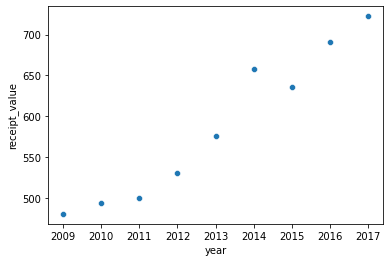

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

#dft = df.groupby('year').mean()

sns.scatterplot(data=dft, x='year', y='receipt_value')
#dft['receipt_value'].plot()

In [12]:
dft.index

Int64Index([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype='int64', name='year')

In [13]:
# ADICIONAR CÓDIGO AQUI
from scipy.stats import linregress

regress = linregress(dft.index, dft['receipt_value'])

a = regress.slope
b = regress.intercept

def predict(year):
    return year * a + b

a = 32.68 b = -65188.72


In [32]:
import numpy as np

np.corrcoef(dft.index, dft['receipt_value'])

array([[1.        , 0.97342783],
       [0.97342783, 1.        ]])

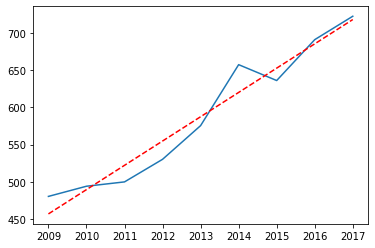

In [28]:
yhat = [predict(year) for year in range(2009, 2018)]

plt.plot(dft.index, dft['receipt_value'])
plt.plot(dft.index, yhat, 'r--')

In [15]:
predict(2021)

848.7937243230772

Como se percebe há uma correlação muito forte entre o ano e o valor médio dos recibos. Por meio de uma regressão linear, podemos obter uma boa estimativa de quanto será o valor médio do recibo neste ano de 2021, no caso, o valor obtido foi de **R\$ 848,79**.

### 2. Existem deputados que são outliers com relação a gastos com gasolina? Se sim, quais? 

In [ ]:
# ADICIONAR CÓDIGO AQUI

### 3. Qual empresa de combustível recebeu mais? Existe alguma relação com possíveis outliers da análise anterior? 

In [ ]:
# ADICIONAR CÓDIGO AQUI

### 4. Existem estabelecimentos com compras de apenas um deputado? 

In [1]:
# ADICIONAR CÓDIGO AQUI

### 5. Qual deputado tem a maior média de gastos? 

In [2]:
# ADICIONAR CÓDIGO AQUI

### 6. Qual foi o deputado que mais gastou em ano eleitoral? 

In [ ]:
# ADICIONAR CÓDIGO AQUI

### 7. Qual é a categoria onde os gastos são maiores? E qual é a categoria onde os gastos são menores?

In [ ]:
# ADICIONAR CÓDIGO AQUI

## Conclusão

ADICIONAR